## IMPORTING BASIC LIBRARIES & DATA

In [2]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing data
data = pd.read_csv('hotel_cancel.csv')

## ------ NORMAL DISTRIBUTION (GAUSSIAN)------

- Continuous Random Variable
- The basic assumption for Statistical Inference
- Symmetric (mean=median=mode)
- Asymptotic (its tail gets closer & closer to the horizontal axis but it never touches it)
- Standard Normal Distribution has mean=0 & stdev=1
- Z-Scores & Z-Tables are useful for cumulative probability calculation
    - Z = (X-mean) / stdev 
    - X = (Z*stdev) + mean

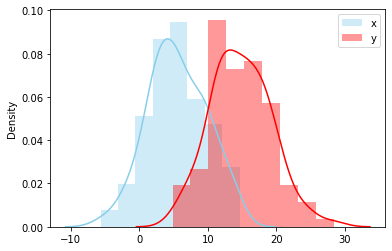

In [47]:
# generating the random variables 
np.random.seed(3)
x = np.random.normal(loc=6, scale=4, size=100)
y = np.random.normal(loc=15, scale=5, size=100)

# plotting the normal distributions
sns.distplot(x, color="skyblue", label="x")
sns.distplot(y, color="red", label="y")
plt.legend()

In [6]:
import scipy.stats as st

# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting > 115kg"""
1 - st.norm.cdf(115, loc=100, scale=10)

0.06680720126885809

- 6,68% is the probability of getting > 115 kg 

In [15]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting < 80kg"""
st.norm.cdf(80, loc=100, scale=10)

0.022750131948179195

- 2,28% is the probability of getting < 80 kg 

In [16]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting between 80kg & 100kg"""
st.norm.cdf(100, loc=100, scale=10) - st.norm.cdf(80, loc=100, scale=10)

0.4772498680518208

- 47,72% is the probability of getting between 80kg & 100kg

In [7]:
# mean(loc):100kg, stdev(scale):10kg
"""what's the probability of getting between 90kg & 110kg"""
norm.cdf(110, loc=100, scale=10) - norm.cdf(90, loc=100, scale=10)

0.6826894921370859

- 68% is the probability of getting between 90kg & 110kg (within 1 stdev)

In [17]:
# mean(loc): 10 bottles, stdev(scale): 2 bottles
"""what's the probability of getting between 6 bottles & 14 bottles"""
norm.cdf(14, loc=10, scale=2) - norm.cdf(6, loc=10, scale=2)

0.9544997361036416

- 95% is the probability of getting orders between 6 bottles & 14 bottles (within 2 stdev)

In [19]:
# returns probability from a Z-score
st.norm.cdf(1.96)

0.9750021048517795

- Z-Score of 1.96 equals to 97,5% cumulative probability

In [20]:
# returns Z-score from a probability
st.norm.ppf(0.975)

1.959963984540054

- 97,5% cumulative probability equals to Z-Score of 1.959

In [27]:
# writing a function that inputs demand mean, stdev, and probability/proportion
def demand_average(mean, stdev, prob):
    result = (st.norm.ppf(prob)*stdev) + mean
    return result

demand_average(12, 3.2, 0.90)

16.100965009742723

- we should purchase approximately 16 kg of daily stock to meet the daily demand on 90% of the days (given mean 12kg & stdev 3.2kg)

## ------ BINOMIAL DISTRIBUTION ------

- Discrete Random Variable
- For counting the number of successes over a fixed number of trials
- Bernoulli Process (There must be only 2 possible outcomes)
- ExpectedValue(X) = n_trials * probability_success
- StdDeviation(X) = np.sqrt(n_trials * probability_success * probability_failure)

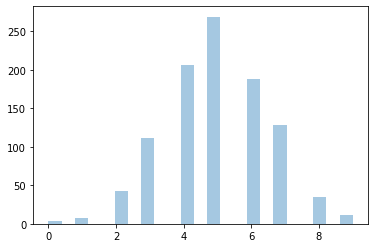

In [102]:
# plotting binomial distribution
x = np.random.binomial(n=10, p=0.5, size=1000)
sns.distplot(x, hist=True, kde=False)
plt.show()

In [82]:
# calculating the probability of 5 successes (out of 5 total trials) with 80% probability
st.binom.pmf(k=5, n=5, p=0.8)

0.3276800000000001

- 32,77% is the probability of getting 5 successes out of 5 trials

In [81]:
# calculating the probability of 4 successes (out of 5 total trials) with 80% probability
st.binom.pmf(k=4, n=5, p=0.8)

0.4095999999999999

- 40,96% is the probability of getting 4 successes out of 5 trials

In [84]:
# calculating the probability of 3 successes (out of 5 total trials) with 80% probability
st.binom.pmf(k=3, n=5, p=0.8)

0.20479999999999993

- 20,48% is the probability of getting 3 successes out of 5 trials

In [88]:
# calculating the probability that a fair coin (50:50) lands on heads 3 times or fewer (<=3 successes) in 5 flips
st.binom.cdf(k=3, n=5, p=0.5)

0.8125

- 81,25% is the probability of getting 3 heads or fewer in 5 flips

In [90]:
# calculating the probability between 6-4 healthy people (out of 10 people) with 70% chance of healthiness
st.binom.cdf(k=6, n=10, p=0.7) - st.binom.cdf(k=3, n=10, p=0.7)

0.3397972032000002

- 33,98% is the probability of getting between 6-4 healthy people out of 10

In [91]:
# calculating the probability getting 8 or above healthy people (out of 10 people) with 70% chance of healthiness
st.binom.cdf(k=10, n=10, p=0.7) - st.binom.cdf(k=7, n=10, p=0.7)

0.38278278639999996

In [101]:
# alternative 2
st.binom.pmf(k=8, n=10, p=0.7) + st.binom.pmf(k=9, n=10, p=0.7) + st.binom.pmf(k=10, n=10, p=0.7)

0.3827827863999999

In [92]:
# alternative 3 
1 - st.binom.cdf(k=7, n=10, p=0.7)

0.38278278639999996

- 38,28% is the probability of getting 8 or above healthy people out of 10

## ------ POISSON DISTRIBUTION ------

- Discrete Random Variable
- For counting the number of successes over a given interval of time or space
- ExpectedValue(X) = rate 
- StdDeviation(X) = np.sqrt(rate)

In [18]:
# on average, the rate of customers using the ATM is 30 per 5 minute. Thus, it is 6 per 1 minute
rate = 6

# guess range
n = np.arange(11)

In [19]:
import scipy.stats as st

mypoisson = st.poisson.pmf(n, rate)
print('### Probabilities:')
for i,j in list(zip(n,mypoisson)):
    print("for",i,'people coming in a minute, the probability is: ',j)

### Probabilities:
for 0 people coming in a minute, the probability is:  0.0024787521766663585
for 1 people coming in a minute, the probability is:  0.014872513059998144
for 2 people coming in a minute, the probability is:  0.04461753917999444
for 3 people coming in a minute, the probability is:  0.08923507835998894
for 4 people coming in a minute, the probability is:  0.13385261753998332
for 5 people coming in a minute, the probability is:  0.16062314104797995
for 6 people coming in a minute, the probability is:  0.1606231410479801
for 7 people coming in a minute, the probability is:  0.1376769780411257
for 8 people coming in a minute, the probability is:  0.1032577335308442
for 9 people coming in a minute, the probability is:  0.06883848902056285
for 10 people coming in a minute, the probability is:  0.04130309341233764


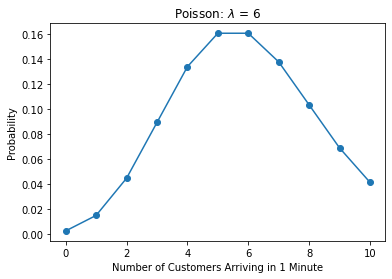

In [20]:
# plotting the poisson distribution
plt.plot(n,mypoisson,'o-')
plt.title('Poisson: $\lambda$ = %i' % rate)
plt.xlabel('Number of Customers Arriving in 1 Minute')
plt.ylabel('Probability')
plt.show()